In [ ]:
# mount my google drive to this notebook so I can access my files

from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
#Imports

import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from xgboost import XGBRegressor,XGBClassifier
from sklearn.metrics import mean_squared_error
import pickle
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB



#Endpoint Imports
# from fastapi import FastAPI
# from colabcode import ColabCode
# import json




In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Stroke_Prediction/healthcare-dataset-stroke-data.csv") #Load in Data using Pandas


# https://www.kaggle.com/datasets/shashwatwork/dementia-prediction-dataset #Original Dataset Link

In [ ]:
#display(df) #Initial view of DF

In [ ]:
#Import Label Encoder, and encode all of the categorical values

df = df.dropna() #Drop Nulls

le = LabelEncoder()


df['gender'] = le.fit_transform(df.gender.values)
df['ever_married'] = le.fit_transform(df.ever_married.values)
df['work_type'] = le.fit_transform(df.work_type.values)
df['Residence_type'] = le.fit_transform(df.Residence_type.values)
df['smoking_status'] = le.fit_transform(df.smoking_status.values)


In [ ]:
df #View of df after encoding

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.6,1,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.0,2,1
5,56669,1,81.0,0,0,1,2,1,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,0,13.0,0,0,0,4,0,103.08,18.6,0,0
5106,44873,0,81.0,0,0,1,3,1,125.20,40.0,2,0
5107,19723,0,35.0,0,0,1,3,0,82.99,30.6,2,0
5108,37544,1,51.0,0,0,1,2,0,166.29,25.6,1,0


In [ ]:
#Seperate Dependent Variables and Target Variable

X = df[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status']]
y = df['stroke']

NameError: ignored

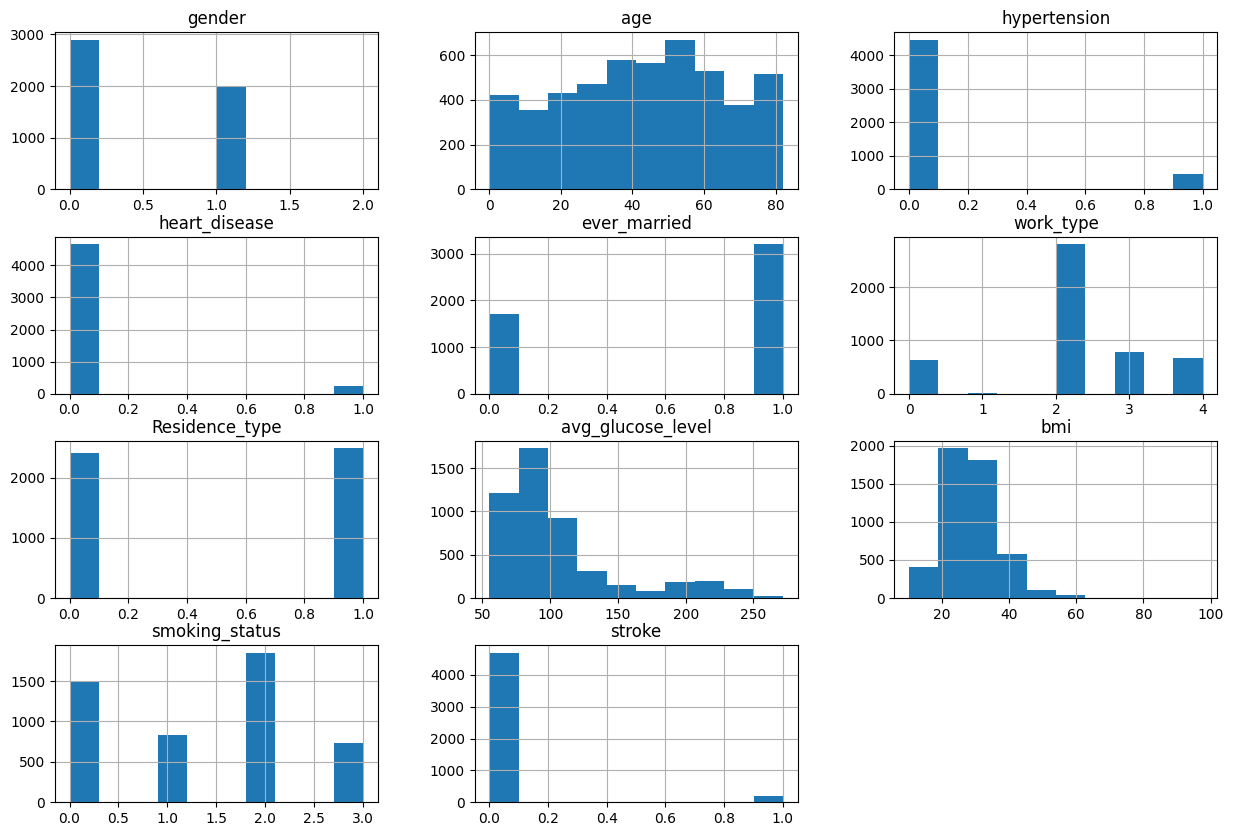

In [ ]:
#Combine Dependent and Independent variables to find correlation to later use in heatmap

df_combined = pd.concat([X, y], axis=1)
correlation = df_combined.corr()

df_combined.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

In [ ]:
#After seeing how imbalanced the dataset is, we used oversampling to balance out the dataset

# Instantiate RandomOverSampler
oversampler = RandomOverSampler()

# Resample the data
X, y = oversampler.fit_resample(X, y)


array([[<Axes: title={'center': 'gender'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'hypertension'}>],
       [<Axes: title={'center': 'heart_disease'}>,
        <Axes: title={'center': 'ever_married'}>,
        <Axes: title={'center': 'work_type'}>],
       [<Axes: title={'center': 'Residence_type'}>,
        <Axes: title={'center': 'avg_glucose_level'}>,
        <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'smoking_status'}>,
        <Axes: title={'center': 'stroke'}>, <Axes: >]], dtype=object)

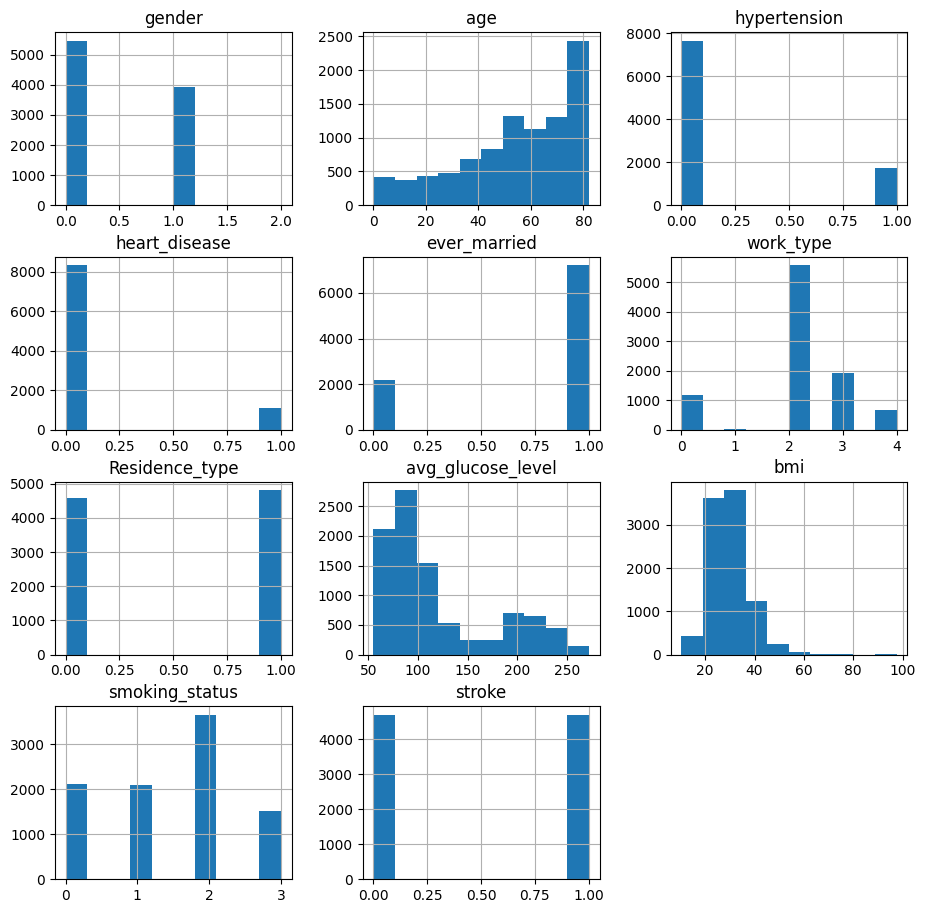

In [ ]:
df_combined = pd.concat([X, y], axis=1)
correlation = df_combined.corr()

df_combined.hist(figsize=(11,11))

<Axes: >

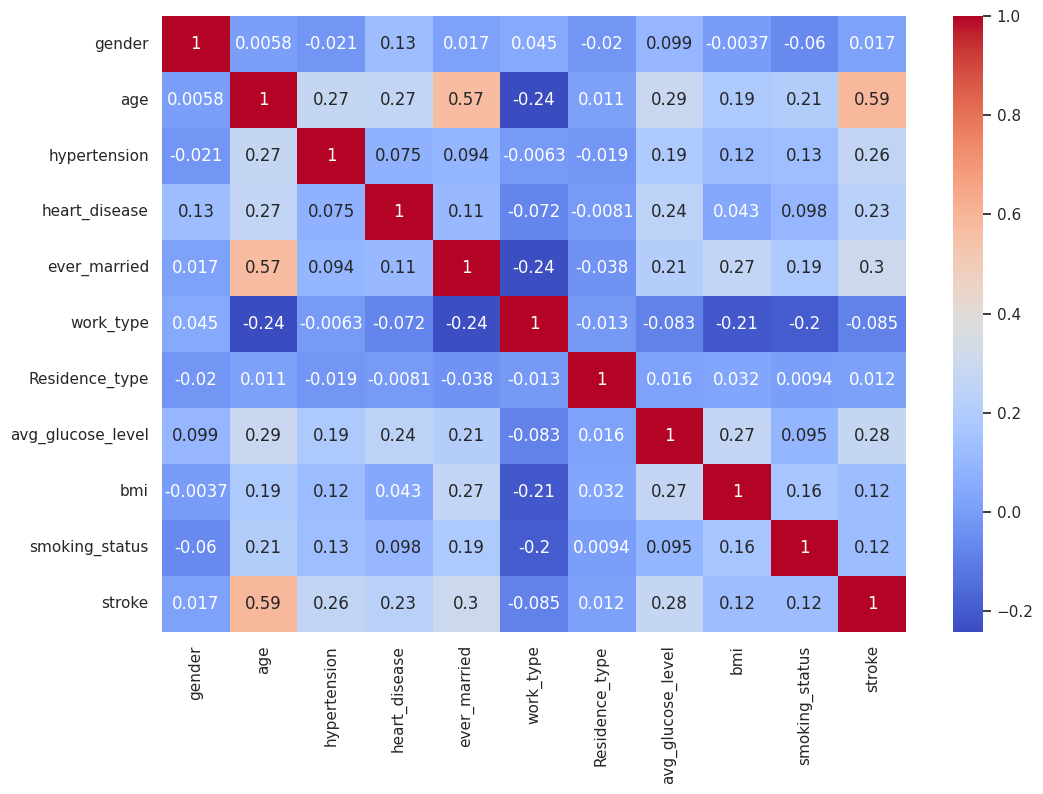

In [ ]:
#Visualize a Heatmap for Correlation



sns.set(rc={"figure.figsize":(12,8)})
sns.heatmap(correlation, annot=True, cmap='coolwarm')


In [ ]:
#Train test split for machine learning model

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = .3, random_state = 0) 


In [ ]:
#We used Grid Search CV to find the best hyperparameters for the XGBoost Classifier

param_grid = {'learning_rate': [0.1, 0.3, 0.5], 'max_depth': [5, 7, 9], 'alpha': [0.01, 0.1, 0.5]} #Hyperparameters that will be tuned
grid_search = GridSearchCV(estimator = XGBClassifier(), param_grid = param_grid, cv = 5, scoring = 'accuracy')

grid_search.fit(X_train, y_train)
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

best_model = XGBClassifier(**grid_search.best_params_)
best_model.fit(X_train, y_train)
yhat = best_model.predict(X_test)

mse = mean_squared_error(y_test, yhat)
print("Mean Squared Error:", mse)

accuracy = accuracy_score(y_test, yhat)
print("Accuracy: %.2f%%" % (accuracy * 100.0))



Best Hyperparameters:  {'alpha': 0.1, 'learning_rate': 0.5, 'max_depth': 9}
Best Score:  0.975227963525836
Mean Squared Error: 0.020921985815602836
Accuracy: 97.91%


In [ ]:
naive_bayes = GaussianNB() #Initiate Naive Bayes Algorithm

naive_bayes.fit(X_train, y_train)# Fit the model to the training data

y_pred = naive_bayes.predict(X_test) #Predict using fitted model


mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse) #Print MSE

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0)) #Print Classification Accuracy


Mean Squared Error: 0.2570921985815603
Accuracy: 74.29%


In [ ]:
#Use XGBClassifier and train it using the split training and testing data. 


model = XGBClassifier(learning_rate=0.3, max_depth = 9, alpha = 0.1)

model.fit(X_train, y_train)
yhat = model.predict(X_test)

mse = mean_squared_error(y_test, yhat)
print("Mean Squared Error:", mse)

accuracy = accuracy_score(y_test, yhat)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


Mean Squared Error: 0.02624113475177305
Accuracy: 97.38%


In [ ]:
#Save XGBoost Classifier as Pkl file


Pkl_Filename = "model_tree.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(model, file)

In [ ]:
#Neural network Implementation

# define the model
model = Sequential()
model.add(Dense(12, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the model
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

# fit the model
model.fit(X_train, y_train, epochs=100, batch_size=64)

Epoch 1/100
103/103 [==============================] - 1s 1ms/step - loss: 0.3392 - accuracy: 0.5897
Epoch 2/100
103/103 [==============================] - 0s 1ms/step - loss: 0.1806 - accuracy: 0.7114
Epoch 3/100
103/103 [==============================] - 0s 1ms/step - loss: 0.1783 - accuracy: 0.7167
Epoch 4/100
103/103 [==============================] - 0s 1ms/step - loss: 0.1758 - accuracy: 0.7187
Epoch 5/100
103/103 [==============================] - 0s 1ms/step - loss: 0.1752 - accuracy: 0.7261
Epoch 6/100
103/103 [==============================] - 0s 1ms/step - loss: 0.1741 - accuracy: 0.7296
Epoch 7/100
103/103 [==============================] - 0s 1ms/step - loss: 0.1721 - accuracy: 0.7342
Epoch 8/100
103/103 [==============================] - 0s 2ms/step - loss: 0.1712 - accuracy: 0.7394
Epoch 9/100
103/103 [==============================] - 0s 2ms/step - loss: 0.1710 - accuracy: 0.7389
Epoch 10/100
103/103 [==============================] - 0s 2ms/step - loss: 0.1702 - accura

NameError: ignored

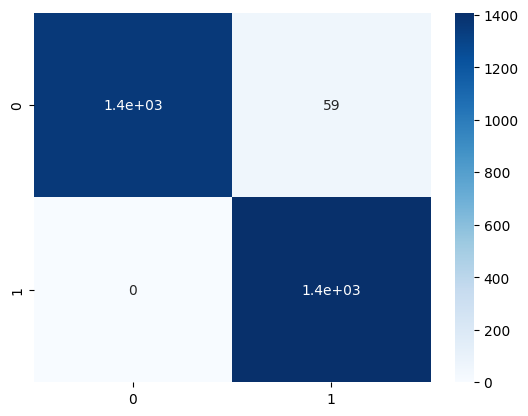

In [ ]:
#Confusion Matrix to validate XGBoost Model


# Create a dataframe with the actual and predicted values
results = pd.DataFrame({'Actual': y_test, 'Predicted': yhat})

# display(results)
cm = confusion_matrix(y_test, yhat)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues')

# Set the axis labels
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Show the plot
plt.show()


In [ ]:
# In the next two chunks of code we deploy our model as an endpoint using FastAPI for testing



from pydantic import BaseModel
import uvicorn
import pickle
from fastapi import FastAPI



class Stroke_Prediction(BaseModel): #Create Stroke Prediction class to pass into FastAPI instance
    gender: float 
    age: float 
    hypertension: float 
    heart_disease: float 
    ever_married: float 
    work_type: float 
    Residence_type: float
    avg_glucose_level: float 
    bmi: float
    smoking_status: float
    class Config:
        schema_extra = {
            "example": {             
                "gender": 1,
                "age": 68,
                "hypertension": 0,
                "heart_disease": 1,
                "ever_married": 1,
                "work_type": 2,
                "Residence_type": 1,
                "avg_glucose_level": 95,
                "bmi": 25,
                "smoking_status": 1

            }
        }





In [ ]:
#Endpoint

app = FastAPI()



@app.on_event("startup") #Load XGBoost Model as soon as Endpoint is running
def load_model():
    global model
    model = pickle.load(open("model_tree.pkl", "rb"))
    return('success')

@app.get('/')
def index():
    return {'message': 'This is the homepage of the API '}

@app.post('/predict') #Prediction - loads model, recieves all data, puts them into dataframe, and predicts output from model loaded on startup
def new_model(data: Stroke_Prediction):

    received = data.dict()

    gender = received['gender']
    age = received['age']
    hypertension = received['hypertension']
    heart_disease = received['heart_disease']
    ever_married = received['ever_married']
    work_type = received['work_type']
    Residence_type = received['Residence_type']
    avg_glucose_level = received['avg_glucose_level']
    bmi = received['bmi']
    smoking_status = received['smoking_status']


    temp_list = [gender,age,hypertension,heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status]
    temp_df = pd.DataFrame (temp_list).transpose()
    temp_df = temp_df.rename(columns={0: 'gender', 1: 'age', 2: 'hypertension', 3: 'heart_disease', 4: 'ever_married', 5: 'work_type', 6: 'Residence_type', 7: 'avg_glucose_level', 8: 'bmi', 9: 'smoking_status'})



    display(temp_df)

    pred_name = model.predict(temp_df)
    print(pred_name)
    pred_ndlist = pred_name[0]
    new_pred = pred_ndlist.tolist()
 



    return(new_pred)




In [ ]:
#Endpoint Deployment

from colabcode import ColabCode 
server = ColabCode(port=10000, code=False) 
server.run_app(app=app)

INFO:     Started server process [142]
INFO:uvicorn.error:Started server process [142]
INFO:     Waiting for application startup.
INFO:uvicorn.error:Waiting for application startup.
INFO:     Application startup complete.
INFO:uvicorn.error:Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:10000 (Press CTRL+C to quit)
INFO:uvicorn.error:Uvicorn running on http://127.0.0.1:10000 (Press CTRL+C to quit)


Public URL: NgrokTunnel: "https://6f69-35-229-207-24.ngrok.io" -> "http://localhost:10000"


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1.0,68.0,0.0,1.0,1.0,2.0,1.0,95.0,25.0,1.0


[0]
INFO:     54.86.50.139:0 - "POST /predict HTTP/1.1" 200 OK


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1.0,12.0,0.0,1.0,1.0,2.0,1.0,95.0,25.0,1.0


[0]
INFO:     54.86.50.139:0 - "POST /predict HTTP/1.1" 200 OK


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1.0,70.0,0.0,1.0,1.0,2.0,1.0,95.0,25.0,1.0


[0]
INFO:     54.86.50.139:0 - "POST /predict HTTP/1.1" 200 OK


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1.0,70.0,0.0,1.0,1.0,2.0,1.0,95.0,605.0,1.0


[0]
INFO:     54.86.50.139:0 - "POST /predict HTTP/1.1" 200 OK


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1.0,70.0,0.0,1.0,1.0,2.0,1.0,905.0,605.0,1.0


[1]
INFO:     54.86.50.139:0 - "POST /predict HTTP/1.1" 200 OK


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1.0,70.0,0.0,1.0,1.0,2.0,1.0,500.0,30.0,3.0


[1]
INFO:     54.86.50.139:0 - "POST /predict HTTP/1.1" 200 OK


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1.0,70.0,0.0,1.0,1.0,2.0,1.0,240.0,30.0,3.0


[1]
INFO:     54.86.50.139:0 - "POST /predict HTTP/1.1" 200 OK


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1.0,12.0,0.0,1.0,1.0,2.0,1.0,120.0,30.0,0.0


[0]
INFO:     54.86.50.139:0 - "POST /predict HTTP/1.1" 200 OK


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1.0,12.0,0.0,1.0,0.0,2.0,1.0,120.0,30.0,0.0


[0]
INFO:     54.86.50.139:0 - "POST /predict HTTP/1.1" 200 OK


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1.0,12.0,0.0,1.0,0.0,0.0,1.0,120.0,30.0,0.0


[0]
INFO:     54.86.50.139:0 - "POST /predict HTTP/1.1" 200 OK


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1.0,45.0,0.0,1.0,1.0,0.0,1.0,190.0,40.0,0.0


[0]
INFO:     54.86.50.139:0 - "POST /predict HTTP/1.1" 200 OK


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1.0,45.0,0.0,1.0,1.0,0.0,1.0,190.0,40.0,3.0


[0]
INFO:     54.86.50.139:0 - "POST /predict HTTP/1.1" 200 OK


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1.0,45.0,0.0,1.0,1.0,2.0,1.0,190.0,40.0,3.0


[0]
INFO:     54.86.50.139:0 - "POST /predict HTTP/1.1" 200 OK


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1.0,45.0,0.0,1.0,2.0,2.0,1.0,190.0,40.0,3.0


[0]
INFO:     54.86.50.139:0 - "POST /predict HTTP/1.1" 200 OK


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1.0,45.0,0.0,1.0,1.0,2.0,1.0,250.0,40.0,3.0


[0]
INFO:     54.86.50.139:0 - "POST /predict HTTP/1.1" 200 OK


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1.0,65.0,0.0,1.0,1.0,2.0,1.0,250.0,40.0,3.0


[0]
INFO:     54.86.50.139:0 - "POST /predict HTTP/1.1" 200 OK


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1.0,65.0,1.0,1.0,1.0,2.0,1.0,250.0,40.0,3.0


[1]
INFO:     54.86.50.139:0 - "POST /predict HTTP/1.1" 200 OK


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1.0,65.0,1.0,1.0,1.0,2.0,1.0,170.0,40.0,3.0


[0]
INFO:     54.86.50.139:0 - "POST /predict HTTP/1.1" 200 OK


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1.0,65.0,1.0,1.0,1.0,2.0,1.0,170.0,60.0,3.0


[0]
INFO:     54.86.50.139:0 - "POST /predict HTTP/1.1" 200 OK


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1.0,65.0,1.0,2.0,1.0,2.0,1.0,170.0,60.0,3.0


[0]
INFO:     54.86.50.139:0 - "POST /predict HTTP/1.1" 200 OK


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1.0,65.0,1.0,1.0,1.0,2.0,1.0,190.0,60.0,3.0


[0]
INFO:     54.86.50.139:0 - "POST /predict HTTP/1.1" 200 OK


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,0.0,65.0,1.0,1.0,1.0,2.0,1.0,190.0,60.0,3.0


[0]
INFO:     54.86.50.139:0 - "POST /predict HTTP/1.1" 200 OK


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,0.0,32.0,0.0,0.0,1.0,0.0,1.0,150.0,40.0,3.0


[0]
INFO:     54.86.50.139:0 - "POST /predict HTTP/1.1" 200 OK


INFO:     Shutting down
INFO:uvicorn.error:Shutting down
INFO:     Waiting for application shutdown.
INFO:uvicorn.error:Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:uvicorn.error:Application shutdown complete.
INFO:     Finished server process [142]
INFO:uvicorn.error:Finished server process [142]


In [ ]:
# pip install ColabCode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
